<a href="https://colab.research.google.com/github/sheikhyounus123/pnemounoconosis-_detection/blob/main/cnn6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive


In [ ]:
# Step 2: Mount Google Drive to save and load the model
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Global Variables
img_width, img_height = 150, 150
batch_size = 16
epochs = 25
data_dir = '/content/drive/MyDrive/data and models/data/chest'  # Path to dataset (infected and non_infected subfolders)


In [ ]:
# Step 3: Load all data from the directory (infected and non_infected subfolders)
dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    label_mode='binary',  # Binary classification (infected and non-infected)
    shuffle=True  # Shuffle the data
)

# Step 4: Split the dataset into training (80%) and validation (20%)
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
validation_size = dataset_size - train_size

# Splitting the dataset
train_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size)


Found 940 files belonging to 2 classes.


In [ ]:
# Step 5: Data Augmentation Block
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.1),  # Random rotation
    tf.keras.layers.RandomZoom(0.1)  # Random zoom
])


In [ ]:
# Step 6: Define the CNN Model
model = Sequential([
    data_augmentation,  # Apply data augmentation on the input images
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),  # Flatten the 3D features into a 1D vector
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 8: Define checkpoint to save the best model during training
checkpoint_path = '/content/drive/MyDrive/pneumoconiosis_cnn_best_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Step 9: Train the model
history = model.fit(
    train_dataset,  # Training data
    validation_data=validation_dataset,  # Validation data
    epochs=epochs,  # Number of epochs
    callbacks=[checkpoint]  # Save the best model
)


Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5561 - loss: 35.1818 - val_accuracy: 0.7287 - val_loss: 0.5465
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6716 - loss: 0.5760 - val_accuracy: 0.6862 - val_loss: 0.5837
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6699 - loss: 0.5758 - val_accuracy: 0.6543 - val_loss: 0.5551
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6959 - loss: 0.6731 - val_accuracy: 0.6755 - val_loss: 0.5651
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6335 - loss: 0.5837 - val_accuracy: 0.7500 - val_loss: 0.5119
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6846 - loss: 0.5849 - val_accuracy: 0.7340 - val_loss: 0.4918
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6781 - loss: 0.5666 - val_accuracy: 0.6809 - val_loss: 0.5045
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6823 - loss: 0.5404 - val_accuracy: 0.6596 - val_los

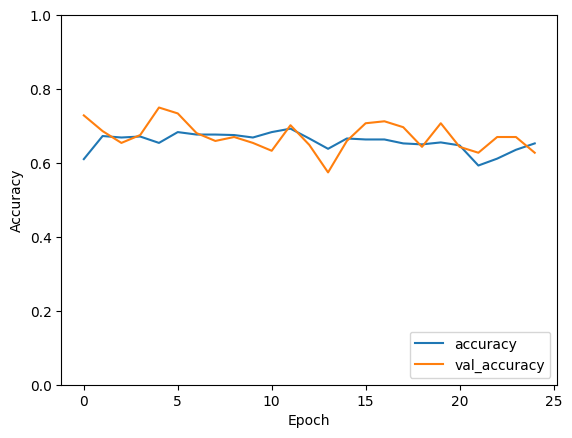

In [ ]:
# Step 10: Plot the training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Step 11: Load the best saved model from Google Drive
model = tf.keras.models.load_model(checkpoint_path)


In [ ]:
# Step 12: Predict function for a single image
def predict_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = tf.keras.utils.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0  # Normalize the image to 0-1 range

    prediction = model.predict(img_tensor)
    if prediction[0] > 0.5:
        print("Predicted: Infected")
    else:
        print("Predicted: Non-Infected")

# Example usage of prediction
predict_image('/content/drive/My Drive/.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted: Non-Infected
